In [9]:
from scipy.stats import kstest
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline
sns.set_theme(style="whitegrid")
from Class import taux_remplissage
from sklearn import decomposition
from functions_pca import *
from sklearn import preprocessing

Populating the interactive namespace from numpy and matplotlib


In [6]:
fakeTickets = pd.read_csv("../../lab/origin_values/faux_billets.csv", parse_dates=True) 
fakeTickets = fakeTickets.select_dtypes(exclude="bool")
fakeTickets

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.67,103.74,103.70,4.01,2.87,113.29
2,171.83,103.76,103.76,4.40,2.88,113.84
3,171.80,103.78,103.65,3.73,3.12,113.63
4,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...
165,172.11,104.23,104.45,5.24,3.58,111.78
166,173.01,104.59,104.31,5.04,3.05,110.91
167,172.47,104.27,104.10,4.88,3.33,110.68
168,171.82,103.97,103.88,4.73,3.55,111.87


In [32]:
## centrer reduire les valeurs (prepare to pca)
std_sc = preprocessing.StandardScaler()
scale = std_sc.fit_transform(fakeTickets)
scaleNp = std_sc.fit_transform(fakeTickets)
scale = pd.DataFrame(scale,columns=fakeTickets.columns)
scale

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.428344,2.669454,3.096563,-0.131590,-1.189874,0.281633
1,-0.887559,-1.097697,-0.691254,-0.860126,-1.274740,0.780697
2,-0.362742,-1.030427,-0.509439,-0.303010,-1.232307,1.377405
3,-0.461145,-0.963156,-0.842767,-1.260106,-0.213913,1.149571
4,0.358883,-1.232238,-0.539742,0.611230,-3.820725,1.062777
...,...,...,...,...,...,...
165,0.555689,0.550431,1.581436,0.896930,1.738009,-0.857535
166,3.507789,1.761301,1.157201,0.611230,-0.510944,-1.801418
167,1.736529,0.684972,0.520847,0.382670,0.677182,-2.050950
168,-0.395543,-0.324086,-0.145809,0.168395,1.610710,-0.759892


In [20]:
pca = decomposition.PCA(n_components=6)
projection = pca.fit_transform(scale)
projection

array([[ 2.15363875,  1.59970945,  1.78745079,  2.43346523,  0.69968952,
        -1.26770217],
       [-2.11041589, -0.52603892,  0.54256277,  0.34454951,  0.0674404 ,
        -0.54460079],
       [-1.97315242, -0.04810178,  0.85871563,  0.37481231, -0.4248861 ,
         0.08048667],
       ...,
       [ 2.06724502,  0.84560244, -0.61028227, -1.71417169,  0.1169579 ,
        -0.50433787],
       [ 0.73925685, -0.97296457, -1.35977212, -0.19173617, -0.24355701,
         0.21142914],
       [ 1.50499242, -1.07972486,  0.18888855, -1.34755225, -0.2891493 ,
        -0.06034599]])

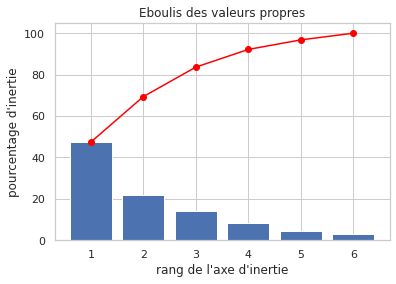

In [22]:
display_scree_plot(pca)

# Représentation des individus par les plans factoriels 

In [159]:
pca_visu = pd.DataFrame(data=projection,columns=['pca_1','pca_2','pca_3','pca_4','pca_5','pca_6'])
to_transform = pd.read_csv("../../lab/origin_values/faux_billets.csv", parse_dates=True) 
res_pca  = pd.concat([pca_visu, to_transform ], ignore_index=False,axis=1)
pca_vis = res_pca[['pca_1','pca_2','pca_3','is_genuine']]
pca_vis

,pca_1,pca_2,pca_3,is_genuine
0,2.153639,1.599709,1.787451,True
1,-2.110416,-0.526039,0.542563,True
2,-1.973152,-0.048102,0.858716,True
3,-2.059795,-0.089105,-0.531529,True
4,-2.403180,0.412170,3.319507,True
...,...,...,...,...
165,2.478626,0.189974,-0.814598,False
166,2.585331,2.914472,0.586789,False
167,2.067245,0.845602,-0.610282,False
168,0.739257,-0.972965,-1.359772,False


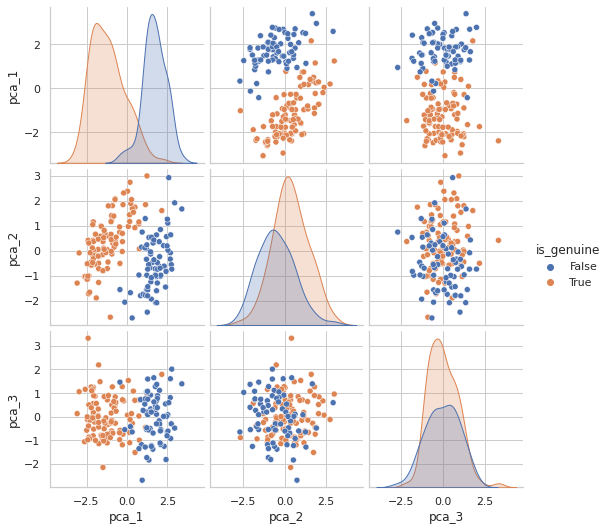

In [160]:
sns.pairplot(pca_vis,hue="is_genuine")

<AxesSubplot:xlabel='pca_1', ylabel='pca_2'>

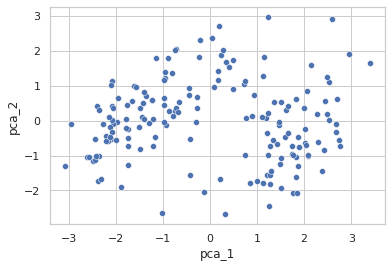

In [161]:
sns.scatterplot(data=pca_vis, x="pca_1", y="pca_2")

In [171]:
vis = pca_vis.copy()
vis['extrem_dimension'] = 0
liste1 = [122,49,29,112,158]
liste2 = [5,166,34,156,70]

for i in range (0, vis.shape[0]):
    if vis.index[i] in liste1 :
        vis.iat[i,4] = 1
    elif vis.index[i] in liste2 :    
         vis.iat[i,4] = 2
    else:
        vis.iat[i,4] = 0

vis        

,pca_1,pca_2,pca_3,is_genuine,extrem_dimension
0,2.153639,1.599709,1.787451,True,0
1,-2.110416,-0.526039,0.542563,True,0
2,-1.973152,-0.048102,0.858716,True,0
3,-2.059795,-0.089105,-0.531529,True,0
4,-2.403180,0.412170,3.319507,True,0
...,...,...,...,...,...
165,2.478626,0.189974,-0.814598,False,0
166,2.585331,2.914472,0.586789,False,2
167,2.067245,0.845602,-0.610282,False,0
168,0.739257,-0.972965,-1.359772,False,0


<AxesSubplot:xlabel='pca_1', ylabel='pca_2'>

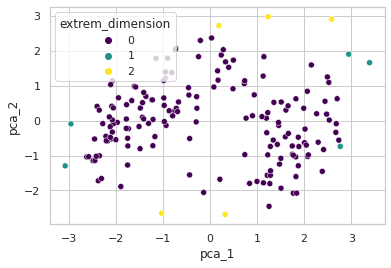

In [175]:
sns.color_palette("cubehelix", as_cmap=True)
sns.scatterplot(data=vis, x="pca_1", y="pca_2",hue='extrem_dimension',palette="viridis")